In [1]:
%matplotlib inline

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import PCA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Autocorrelation function, Partial autocorr func
from statsmodels.tsa.seasonal import STL

# Time series

In [3]:
electricity = pd.read_csv("Electric_Production.csv")

In [4]:
electricity.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
electricity.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [6]:
electricity.DATE = pd.to_datetime(electricity.DATE, format="%m/%d/%Y")

In [7]:
electricity.DATE.isna().any()

False

In [8]:
electricity.describe().T

,count,mean,std,min,25%,50%,75%,max
IPG2211A2N,397.0,88.847218,15.387834,55.3151,77.1052,89.7795,100.5244,129.4048


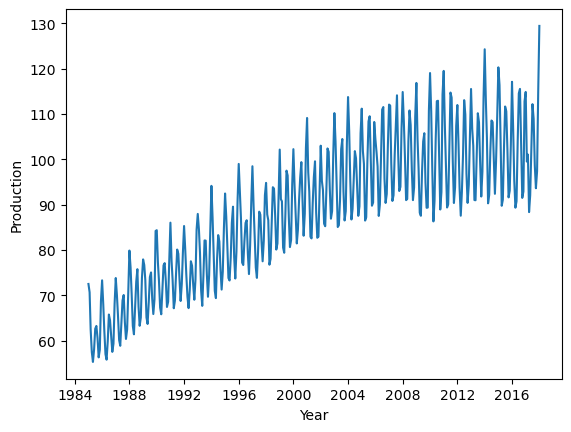

In [9]:
plt.plot(electricity.DATE, electricity.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

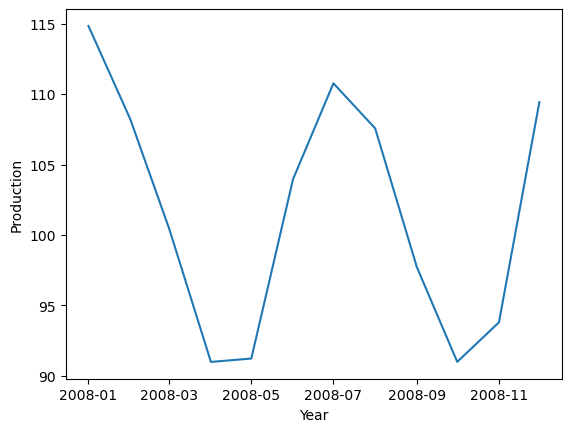

In [10]:
year_2008 = electricity[electricity.DATE.dt.year == 2008]

plt.plot(year_2008.DATE, year_2008.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

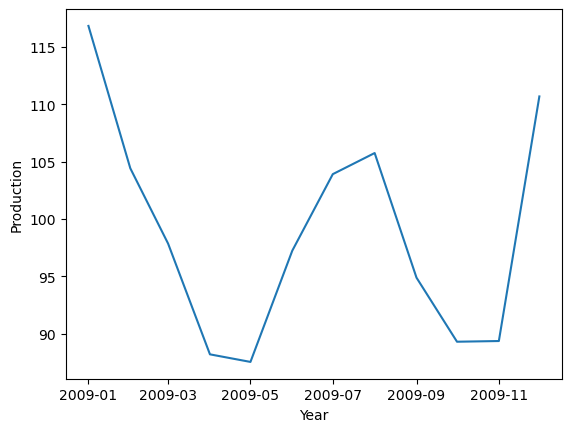

In [11]:
year_2009 = electricity[electricity.DATE.dt.year == 2009]

plt.plot(year_2009.DATE, year_2009.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

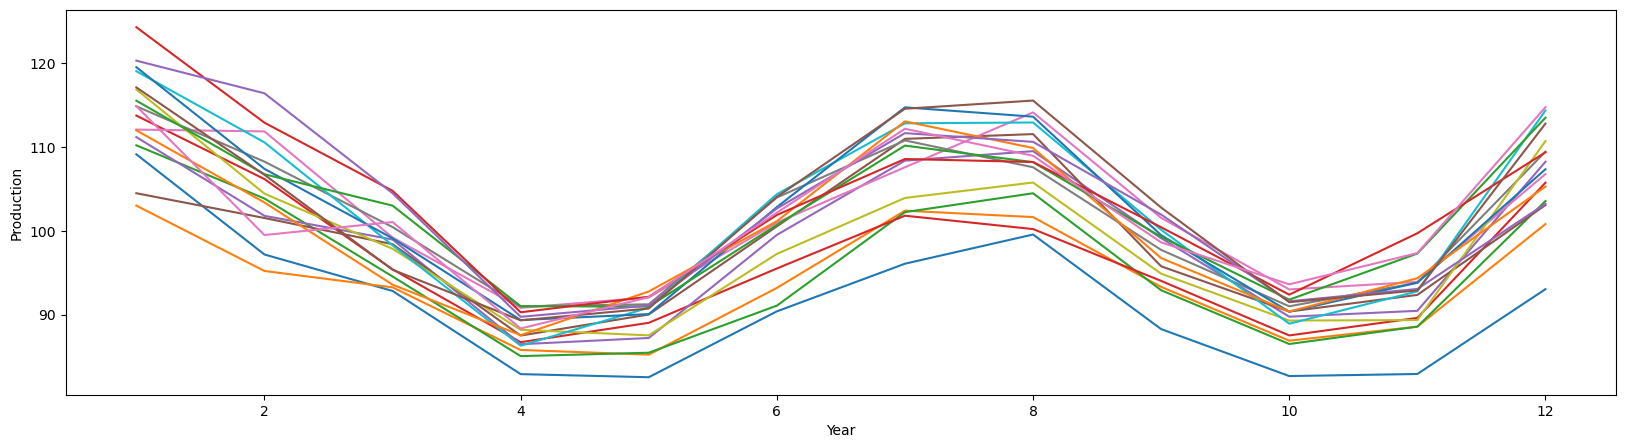

In [12]:
plt.figure(figsize = (20, 5))

for year in range(2001, 2018):
    current_year = electricity[electricity.DATE.dt.year == year]
    plt.plot(current_year.DATE.dt.month, current_year.IPG2211A2N)
    
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

In [13]:
electricity["year"] = electricity.DATE.dt.year
electricity["month"] = electricity.DATE.dt.month

In [14]:
electricity = electricity.drop(columns=["DATE"])

In [15]:
electricity.head()

,IPG2211A2N,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5


In [16]:
linear_regression = Ridge()

In [17]:
target = electricity.IPG2211A2N
attrs = electricity.drop(columns=["IPG2211A2N"])

In [18]:
attrs_train, attrs_test, target_train, target_test = train_test_split(attrs, target, test_size = 0.2)

In [19]:
linear_regression.fit(attrs_train, target_train)

Ridge()

In [20]:
linear_regression.score(attrs_train, target_train)

0.7116445778494368

In [21]:
linear_regression.score(attrs_test, target_test)

0.6913531134569992

In [22]:
test_predict = linear_regression.predict(attrs_test)

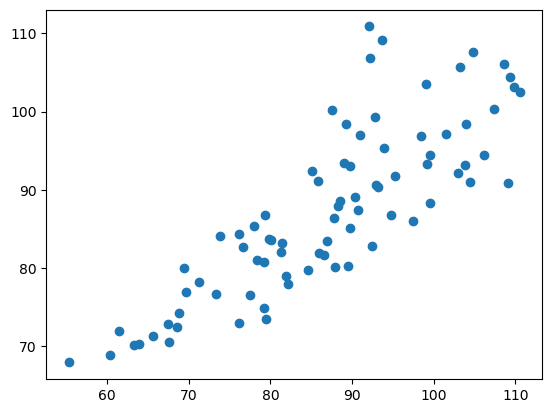

In [23]:
plt.scatter(target_test, test_predict)

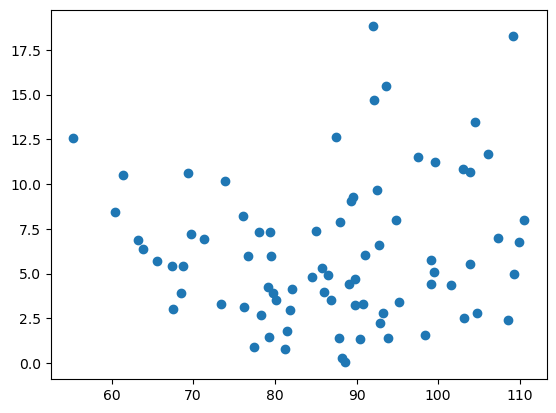

In [24]:
plt.scatter(target_test, abs(test_predict - target_test)) #Abs error

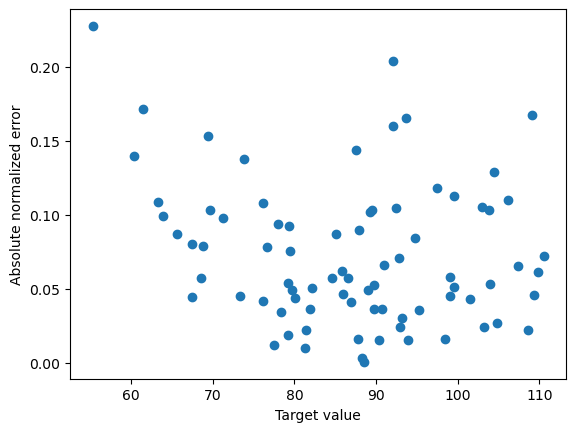

In [25]:
plt.scatter(target_test, abs((test_predict - target_test) / target_test)) # Observed - Estimated

plt.xlabel("Target value")
plt.ylabel("Absolute normalized error")
plt.show()

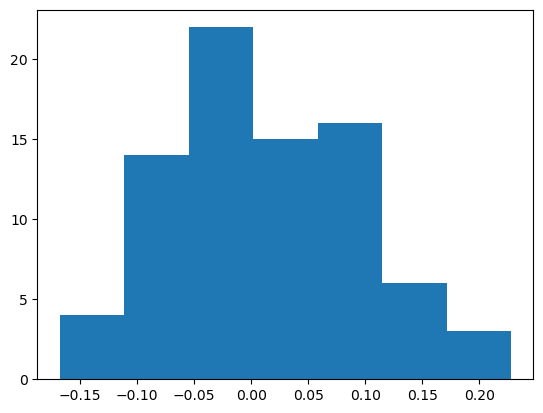

In [26]:
plt.hist(((test_predict - target_test) / target_test), bins="fd")
plt.show()
# High bias

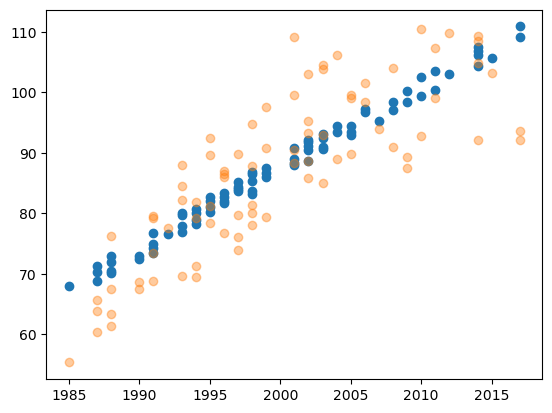

In [27]:
plt.scatter(attrs_test.year, test_predict, label = "Test predictions")
plt.scatter(attrs_test.year, target_test, label="Target", alpha=0.4)

## How to teach the model that the data are linked, measuring the link => $y = f(t)$
## Pearson Coef of corelation 

In [28]:
electricity.shift(1)["IPG2211A2N"]

0           NaN
1       72.5052
2       70.6720
3       62.4502
4       57.4714
         ...   
392    108.9312
393     98.6154
394     93.6137
395     97.3359
396    114.7212
Name: IPG2211A2N, Length: 397, dtype: float64

In [29]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(1))

0.8717308657532123

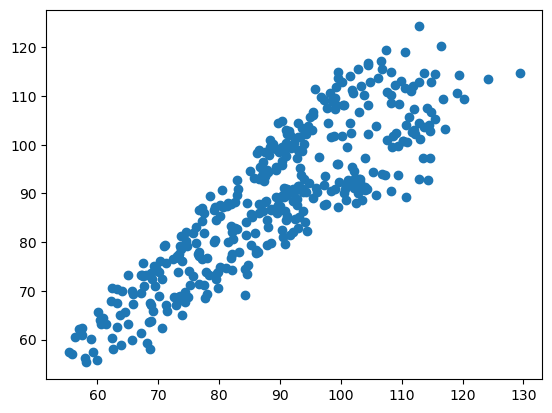

In [30]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(1))

In [31]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(2))

0.6465816539907933

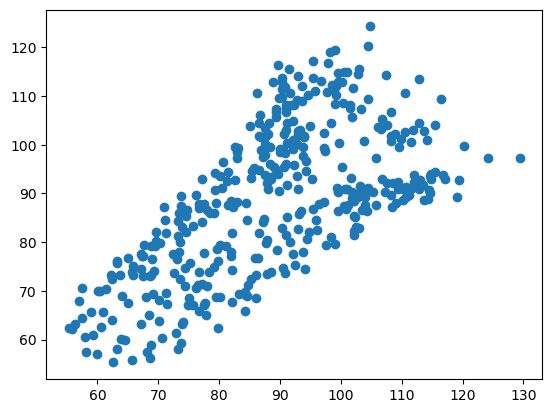

In [32]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(2))
plt.show()

In [33]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(3))

0.5355867575850729

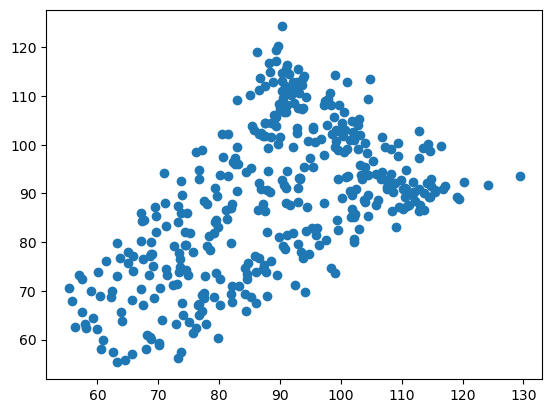

In [34]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(3))
plt.show()

In [35]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(12))

0.9745298544620417

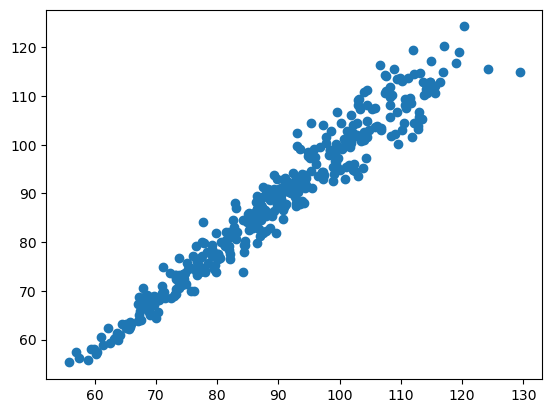

In [36]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(12))
plt.show()

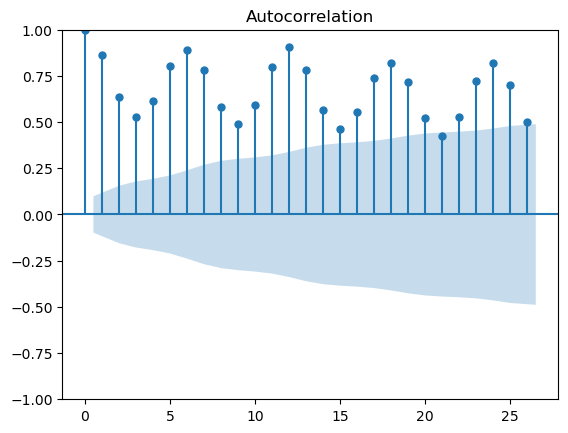

In [37]:
plot_acf(electricity.IPG2211A2N)
plt.show() # => Periods correlations, blue zone - trust interval (outside - trusted, inside - not)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


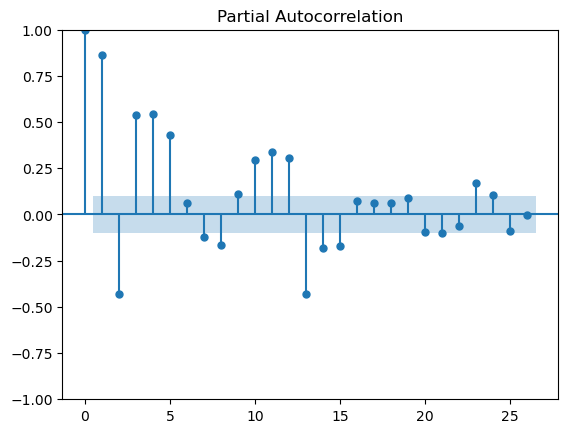

In [38]:
plot_pacf(electricity.IPG2211A2N) # Относително влияние на текущия лаг - (предишен лаг - настоящ)
plt.show()

In [39]:
for lag in range(1, 25):
    electricity[f"lag_{lag}"] = electricity.IPG2211A2N.shift(lag)

In [40]:
electricity = electricity.dropna()

In [41]:
electricity

,IPG2211A2N,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
24,73.8152,1987,1,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,...,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
25,70.0620,1987,2,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,...,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
26,65.6100,1987,3,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,...,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
27,60.1586,1987,4,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,...,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
28,58.8734,1987,5,60.1586,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,...,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,...,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959,101.9204
393,93.6137,2017,10,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,...,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959
394,97.3359,2017,11,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,...,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628
395,114.7212,2017,12,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,...,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203


In [42]:
target = electricity.IPG2211A2N
attrs = electricity.drop(columns = ["IPG2211A2N"])

attrs_train, attrs_test, target_train, target_test = train_test_split(attrs, target, test_size = 0.2)

In [55]:
pca = PCA(n_components = 0.98)

In [56]:
pca.fit(attrs_train)

PCA(n_components=0.98)

In [57]:
pca.explained_variance_ratio_

array([0.73246672, 0.11248094, 0.1066664 , 0.01318427, 0.01157774,
       0.00295444, 0.00265049])

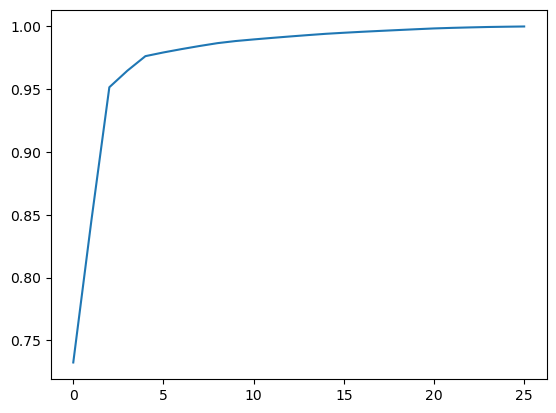

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [58]:
linear_ar_model = Ridge(alpha = 1)
linear_ar_model.fit(attrs_train, target_train)

Ridge(alpha=1)

In [59]:
linear_ar_model.score(attrs_train, target_train)

0.9671047116620776

In [60]:
linear_ar_model.score(attrs_test, target_test)

0.971191243672938

In [61]:
test_predictions = linear_ar_model.predict(attrs_test)

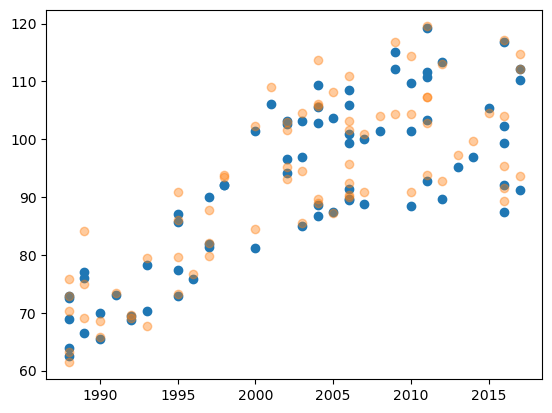

In [62]:
plt.scatter(attrs_test.year, test_predictions, label = "Test predictions")
plt.scatter(attrs_test.year, target_test, label="Target", alpha=0.4)

In [63]:
linear_ar_model.coef_

array([-0.00531164,  0.27714205,  0.56849953, -0.05787821,  0.15046645,
       -0.04513159, -0.02693487,  0.02101661, -0.04051787, -0.04803695,
       -0.03804122,  0.09463147,  0.02240447,  0.43225898, -0.27149803,
        0.05718204, -0.16068478,  0.07401152,  0.13030004,  0.01827069,
        0.06962727, -0.06543551, -0.09091414, -0.00379965, -0.09983165,
        0.27777525])

In [66]:
stl = STL(electricity.IPG2211A2N, period = 12)

In [68]:
result = stl.fit()

<Figure size 2500x1500 with 0 Axes>

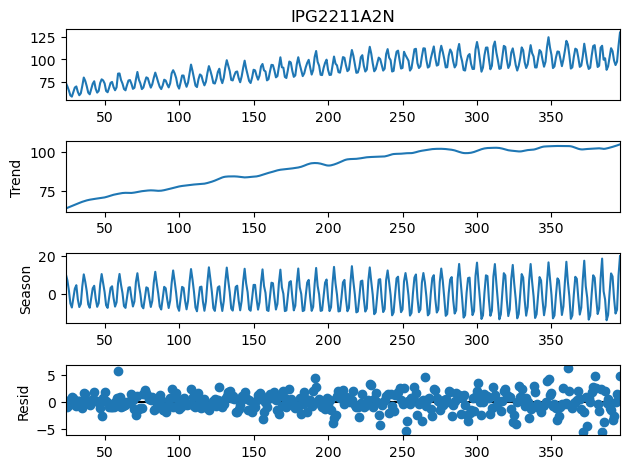

In [73]:
plt.figure(figsize=(25, 15))
result.plot()
plt.show()